In [7]:
import sys
sys.path.append('C:\\Users\\IFIc\\Projects\\sabatsw\\laserlab\\scripts')

from galvo_python.galvos import *
from galvo_python.gaussian2dFit import *

In [8]:
serialport = open_serial_port(port_name="COM4")

SerialException: could not open port 'COM4': PermissionError(13, 'Access is denied.', None, 5)

In [9]:
import matplotlib.pyplot as plt

## Align laser after galvo 

In [ ]:
center0 = [int(65534./2)-3780,int(65534./2)+8900]#calibrated on 19/02/2020
move_to_positionXY(serialport, [0,0], center=center0)

In [10]:
center0 = [int(65534./2) + 3000, int(65534./2) +  8000] #calibrated on 13/05/2020
move_to_positionXY(serialport, [0,0], center=center0)

# Take snap of laser after galvo and before lenses 

## At d = 20 cm from galvo 

### Move laser to center of DCAM 

In [73]:
move_to_positionXY(serialport, [200,0], center=center0)

In [12]:
import pylablib.aux_libs.devices.DCAM as cam
from pylablib.aux_libs.devices.DCAM_lib import lib, DCAMLibError

import matplotlib.pyplot as plt

from time import sleep

In [11]:
#cam.restart_lib()   #  Run if driver is not recognized

In [22]:
cam.get_cameras_number()

cam.DCAMCamera(0).get_model_data()

ModelData(vendor='Hamamatsu', model='C13440-20C', serial_number='S/N: 303065', camera_version='4.31.B')

In [24]:
cam0.properties['EXPOSURE TIME']

Property(name='b'EXPOSURE TIME'', id=2031888, min=0.0010036691729323308, max=10.0, unit=1)

In [28]:
cam0.properties['EXPOSURE TIME'].get_value()


0.009997714285714285

In [31]:
min_texp = cam0.properties['EXPOSURE TIME'].min
cam0.set_value('EXPOSURE TIME', min_texp)

0.0010036691729323308

In [18]:
cam0 = cam.DCAMCamera(0)
lib.dcamapi_uninit()     # For some reason this must be run before opening the camera
cam0.open()

In [19]:
cam0.start_acquisition()
cam0.get_status()

'busy'

##### Old (had to recalibrate)

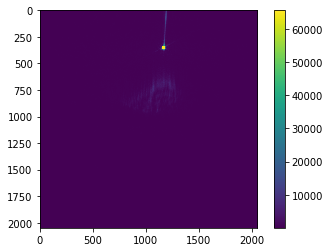

In [48]:
%matplotlib inline

frame = cam0.get_frame(100)

gray = plt.imshow(frame)
plt.colorbar(gray)

In [79]:
move_to_positionXY(serialport, [200,100], center=center0)

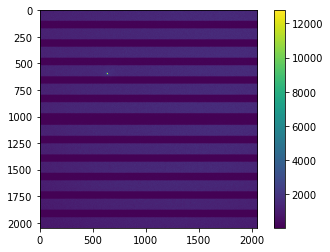

In [51]:
%matplotlib inline

frame = cam0.get_frame(100)

gray = plt.imshow(frame)
plt.colorbar(gray)

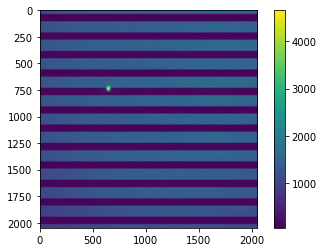

In [81]:
%matplotlib inline

frame = cam0.get_frame(100)

gray = plt.imshow(frame)
plt.colorbar(gray)

In [82]:
plt.imsave('./aligning_4f_052020/test.tiff', frame)

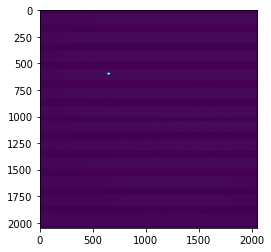

In [76]:
frame = plt.imread('./aligning_4f_052020/test.tiff')
plt.imshow(frame)

In [83]:
guess_centroid(frame)

(735, 645)

In [86]:
img

array([1112.4638, 1143.2872, 1153.4647, ...,  807.6984,  784.3217,
        779.3713])

(735, 645) [235, 1235, 145, 1145]


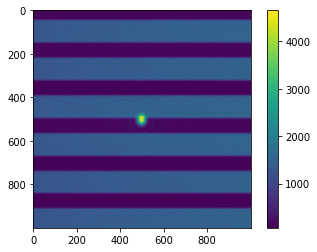

In [92]:
img = rgb2gray(frame)
mx = guess_centroid(frame)
bounds = bound_roi(frame, mx, 500)
print(mx, bounds)
imroi = select_roi(frame, bounds)
gray = plt.imshow(imroi)
plt.colorbar(gray)

In [59]:
frame2.shape, frame.shape

((2048, 2048, 4), (2048, 2048, 4))

In [14]:
#plt.imsave('nolens_20cm.tiff', frame)

In [33]:
plt.imsave('./aligning_4f_052020/nolens_20cm.tiff', frame)

## Fit double gaussian 

In [1]:
import matplotlib.pyplot as plt

##  At d = 3 cm from galvo

### Move laser to center of DCAM 

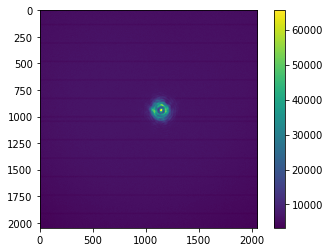

In [65]:
move_to_positionXY(serialport, [0,3000], center=center0)
frame2 = cam0.get_frame(100)

gray2 = plt.imshow(frame2)
plt.colorbar(gray2)

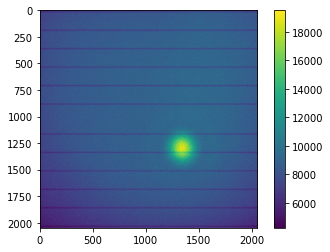

In [31]:
%matplotlib inline

frame = cam0.get_frame(100)

gray = plt.imshow(frame)
plt.colorbar(gray)

In [66]:
plt.imsave('nolens_3cm.tiff', frame2)

(934, 1137) [434, 1434, 637, 1637]


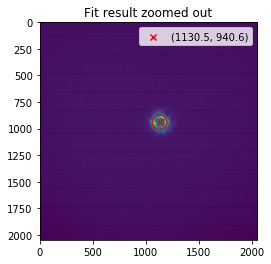

In [42]:
frame2 = plt.imread('nolens_3cm.tiff')
plt.imshow(frame2)

bestfit2 = guessNfitGaussian2d(frame2)
plot_fit_result(frame2, bestfit2)

In [91]:
bestfit2 = guessNfitGaussian2d(frame)
plot_fit_result(frame2, bestfit2)

(812,) [312, 1312]


IndexError: list index out of range

# At d = 160 cm from galvo 

### Move laser to center of DCAM 

In [78]:
move_to_positionXY(serialport, [200,0], center=center0)

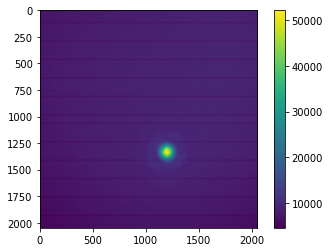

In [92]:
frame0 = cam0.get_frame(100)

gray = plt.imshow(frame0)
plt.colorbar(gray)

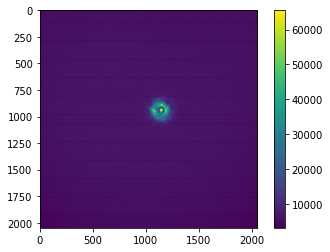

In [77]:
frame0 = cam0.get_frame(100)

gray = plt.imshow(frame0)
plt.colorbar(gray)

In [93]:
plt.imsave('./aligning_4f_052020/nolens_160cm.tiff', frame0)

In [94]:
frame0 = plt.imread('./aligning_4f_052020/nolens_160cm.tiff')

(1330, 1195) [830, 1830, 695, 1695]


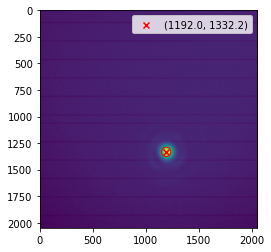

In [95]:
bestfit1 = guessNfitGaussian2d(frame0, flag_p=False)

plot_fit_result(frame0, bestfit1)

(934, 1137) [434, 1434, 637, 1637]


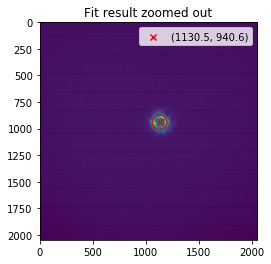

In [67]:
frame2 = plt.imread('nolens_3cm.tiff')
plt.imshow(frame2)

bestfit2 = guessNfitGaussian2d(frame2)
plot_fit_result(frame2, bestfit2)

##### Okay, not too bad collimation: 62 px in x and 400 px in y

# Set lens 2 at d = 80 cm from galvo 

In [144]:
move_to_positionXY(serialport, [-50,200], center=center0)

In [ ]:
%matplotlib notebook
frame0 = cam0.get_frame(100)
fig, ax = plt.subplots (1, 2, figsize=(15,15))
gray = ax[0].imshow(frame0)
#bestfit2 = guessNfitGaussian2d(frame0, DEBUG=True)
#plot_fit_result(frame0, bestfit2)
mx = guess_centroid(frame0)
bounds = bound_roi(frame0, mx, size = 100)
imroi = select_roi(frame0, bounds)
mxroi = guess_centroid(imroi)
ax[1].imshow(imroi)

fitr, fitc = fitGausRowCol(imroi, mxroi, flag_p=False)
sigma_x = fitc[2]
sigma_y = fitr[2]
p0 = [imroi.max(), mxroi[1], mxroi[0], sigma_x, sigma_y]

fit = fitGauss2d(imroi, p0 = p0)
pars = make_params(fit);
plot_fit_result(imroi, pars)
plt.legend()
plt.colorbar(gray)

<IPython.core.display.Javascript object>


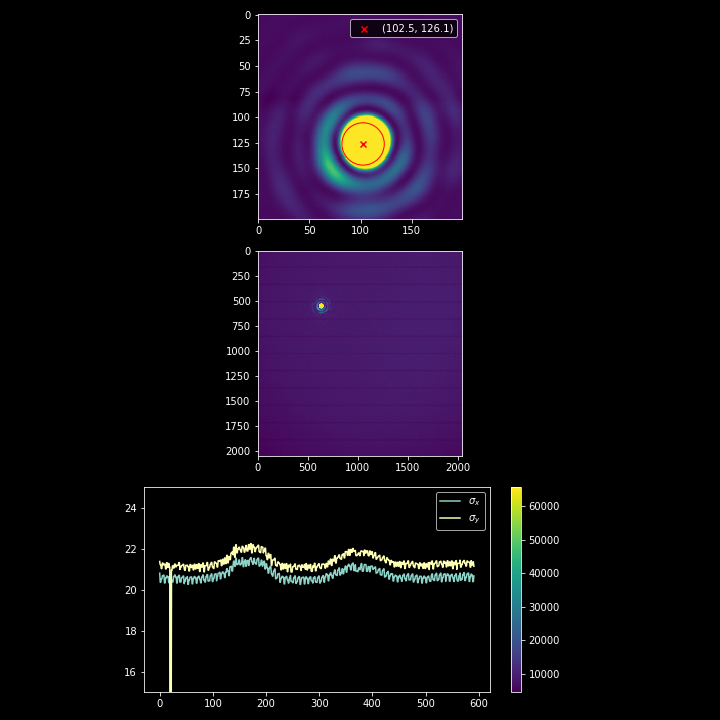

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


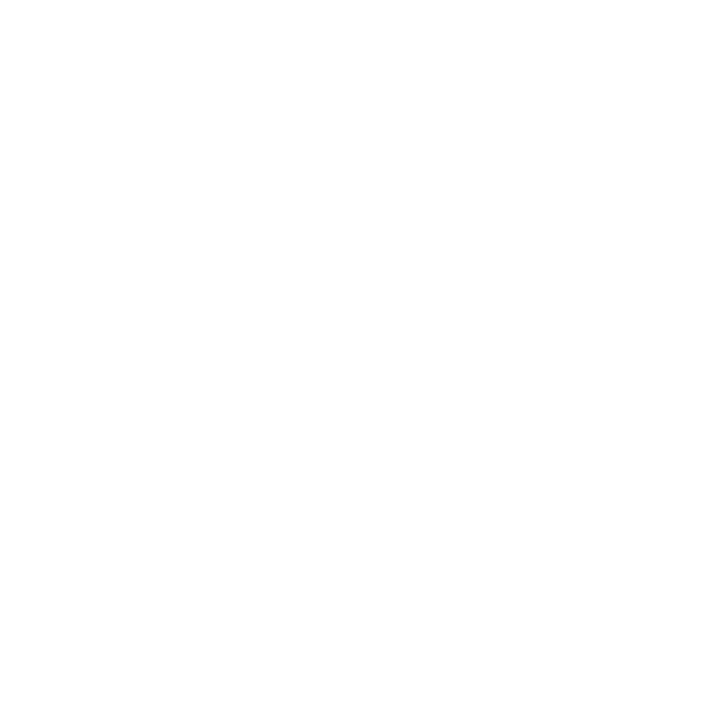

In [104]:
%matplotlib notebook
#fig, ax = plt.subplots(2, figsize=(12,12))
fig = plt.figure(figsize=(10,10))
fig.show()
fig.canvas.draw()
plt.style.use('dark_background')
sx, sy = [], []
while True:
    
    fig = plt.gcf()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)


    frame0 = cam0.get_frame(100)

    #gray = ax[0].imshow(frame0)
    #plt.colorbar(gray)

    mx = guess_centroid(frame0)
    bounds = bound_roi(frame0, mx, size = 100)
    imroi = select_roi(frame0, bounds)
    mxroi = guess_centroid(imroi)
    img = ax2.imshow(frame0)
    fig.colorbar(img)

    fitr, fitc = fitGausRowCol(imroi, mxroi, flag_p=False)
    sigma_x = fitc[2]
    sigma_y = fitr[2]
    p0 = [imroi.max(), mxroi[1], mxroi[0], sigma_x, sigma_y]
    fit = fitGauss2d(imroi, p0 = p0)
    pars = make_params(fit);
    if (pars[3] > 0 ) and (pars[4] > 0):
        sx.append(pars[3])
        sy.append(pars[4])
    plot_fit_result(imroi, pars, ax=ax1)
    
    ax3.plot(sx, label='$\sigma_x$')
    ax3.plot(sy, label='$\sigma_y$')
    ax3.set_ylim(15, 25)
    ax3.legend()
    fig.canvas.draw()
    fig.tight_layout()
    #fig.canvas.update()
    fig.canvas.flush_events()
    fig.subplots_adjust(left=0.2, bottom=None, right=0.8, top=None, wspace=0.1, hspace=None)
    plt.clf()     # Clean figure to update legend, barplot...
    

## Fine tuning position 

<IPython.core.display.Javascript object>


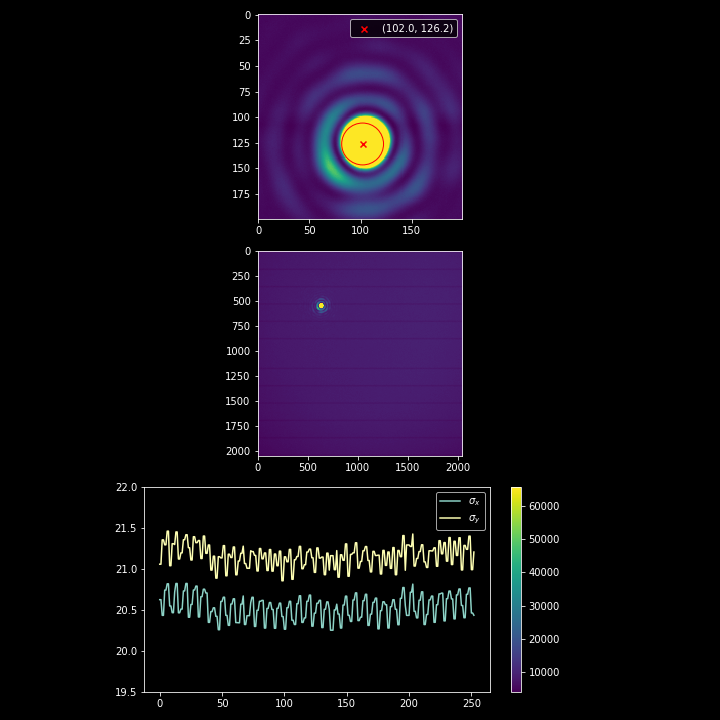

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


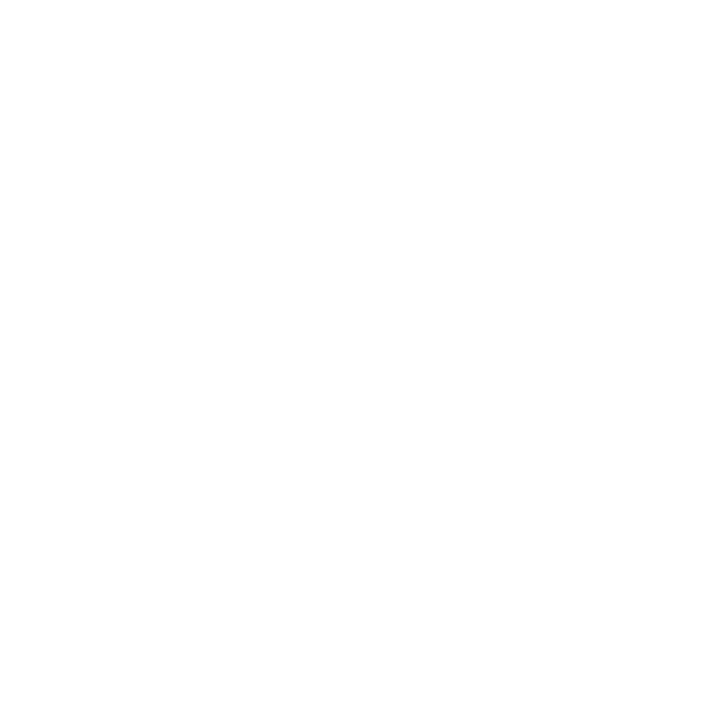

In [105]:
%matplotlib notebook
#fig, ax = plt.subplots(2, figsize=(12,12))
fig = plt.figure(figsize=(10,10))
fig.show()
fig.canvas.draw()
plt.style.use('dark_background')
sx, sy = [], []
while True:
    
    fig = plt.gcf()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)


    frame0 = cam0.get_frame(100)

    #gray = ax[0].imshow(frame0)
    #plt.colorbar(gray)

    mx = guess_centroid(frame0)
    bounds = bound_roi(frame0, mx, size = 100)
    imroi = select_roi(frame0, bounds)
    mxroi = guess_centroid(imroi)
    img = ax2.imshow(frame0)
    fig.colorbar(img)

    fitr, fitc = fitGausRowCol(imroi, mxroi, flag_p=False)
    sigma_x = fitc[2]
    sigma_y = fitr[2]
    p0 = [imroi.max(), mxroi[1], mxroi[0], sigma_x, sigma_y]
    fit = fitGauss2d(imroi, p0 = p0)
    pars = make_params(fit);
    if (pars[3] > 0 ) and (pars[4] > 0):
        sx.append(pars[3])
        sy.append(pars[4])
    plot_fit_result(imroi, pars, ax=ax1)
    
    ax3.plot(sx, label='$\sigma_x$')
    ax3.plot(sy, label='$\sigma_y$')
    ax3.set_ylim(19.5, 22)
    ax3.legend()
    fig.canvas.draw()
    fig.tight_layout()
    #fig.canvas.update()
    fig.canvas.flush_events()
    fig.subplots_adjust(left=0.2, bottom=None, right=0.8, top=None, wspace=0.1, hspace=None)
    plt.clf()     # Clean figure to update legend, barplot...
    

##### So se set position of lens 2, z2 = 12.21  and  zcam = 4.87 mm

In [109]:
# Relative position for reference (coordinated movement): the actual distance is 35-ish cm + dist_f2
dist_f2 =  12.21 + 4.87
dist_f2

17.080000000000002

# Set lens 1 at d = 40 cm from galvo, now cam and lens 2 move together 

<IPython.core.display.Javascript object>


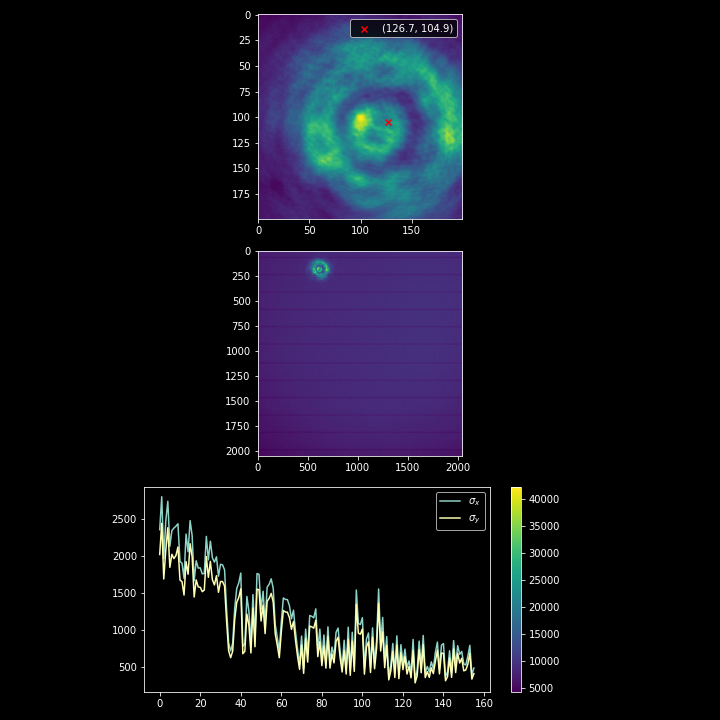

KeyboardInterrupt: 

In [124]:
%matplotlib notebook
#fig, ax = plt.subplots(2, figsize=(12,12))
fig = plt.figure(figsize=(10,10))
fig.show()
fig.canvas.draw()
plt.style.use('dark_background')
sx, sy = [], []
while True:
    
    fig = plt.gcf()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)


    frame0 = cam0.get_frame(100)

    #gray = ax[0].imshow(frame0)
    #plt.colorbar(gray)

    mx = guess_centroid(frame0)
    bounds = bound_roi(frame0, mx, size = 100)
    imroi = select_roi(frame0, bounds)
    mxroi = guess_centroid(imroi)
    img = ax2.imshow(frame0)
    fig.colorbar(img)

    fitr, fitc = fitGausRowCol(imroi, mxroi, flag_p=False)
    sigma_x = fitc[2]
    sigma_y = fitr[2]
    p0 = [imroi.max(), mxroi[1], mxroi[0], sigma_x, sigma_y]
    fit = fitGauss2d(imroi, p0 = p0)
    pars = make_params(fit);
    if (pars[3] > 0 ) and (pars[4] > 0):
        sx.append(pars[3])
        sy.append(pars[4])
    plot_fit_result(imroi, pars, ax=ax1)
    
    ax3.plot(sx, label='$\sigma_x$')
    ax3.plot(sy, label='$\sigma_y$')
#    ax3.set_ylim(15, 25)
    ax3.legend()
    fig.canvas.draw()
    fig.tight_layout()
    #fig.canvas.update()
    fig.canvas.flush_events()
    fig.subplots_adjust(left=0.2, bottom=None, right=0.8, top=None, wspace=0.1, hspace=None)
    plt.clf()     # Clean figure to update legend, barplot...
    

In [134]:
plt.gcf()
plt.savefig('./aligning_4f_052020\lens1_pos.png')

<IPython.core.display.Javascript object>


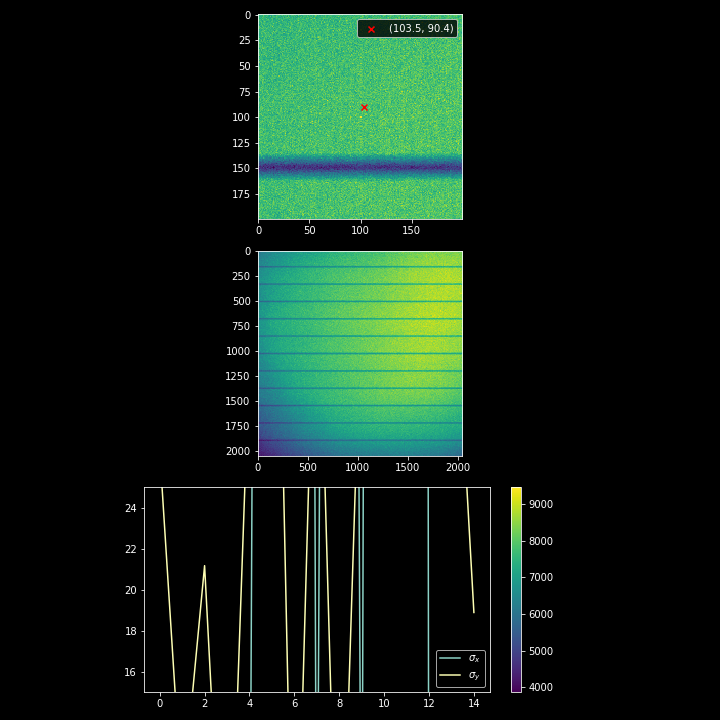

KeyboardInterrupt: 

In [141]:
%matplotlib notebook
#fig, ax = plt.subplots(2, figsize=(12,12))
fig = plt.figure(figsize=(10,10))
fig.show()
fig.canvas.draw()
plt.style.use('dark_background')
sx, sy = [], []
while True:
    
    fig = plt.gcf()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)


    frame0 = cam0.get_frame(100)

    #gray = ax[0].imshow(frame0)
    #plt.colorbar(gray)

    mx = guess_centroid(frame0)
    bounds = bound_roi(frame0, mx, size = 100)
    imroi = select_roi(frame0, bounds)
    mxroi = guess_centroid(imroi)
    img = ax2.imshow(frame0)
    fig.colorbar(img)

    fitr, fitc = fitGausRowCol(imroi, mxroi, flag_p=False)
    sigma_x = fitc[2]
    sigma_y = fitr[2]
    p0 = [imroi.max(), mxroi[1], mxroi[0], sigma_x, sigma_y]
    fit = fitGauss2d(imroi, p0 = p0)
    pars = make_params(fit);
    if (pars[3] > 0 ) and (pars[4] > 0):
        sx.append(pars[3])
        sy.append(pars[4])
    plot_fit_result(imroi, pars, ax=ax1)
    
    ax3.plot(sx, label='$\sigma_x$')
    ax3.plot(sy, label='$\sigma_y$')
    ax3.set_ylim(15, 25)
    ax3.legend()
    fig.canvas.draw()
    fig.tight_layout()
    #fig.canvas.update()
    fig.canvas.flush_events()
    fig.subplots_adjust(left=0.2, bottom=None, right=0.8, top=None, wspace=0.1, hspace=None)
    plt.clf()     # Clean figure to update legend, barplot...
    

##### Just moving lens 1 this is the minimum sigma I could get